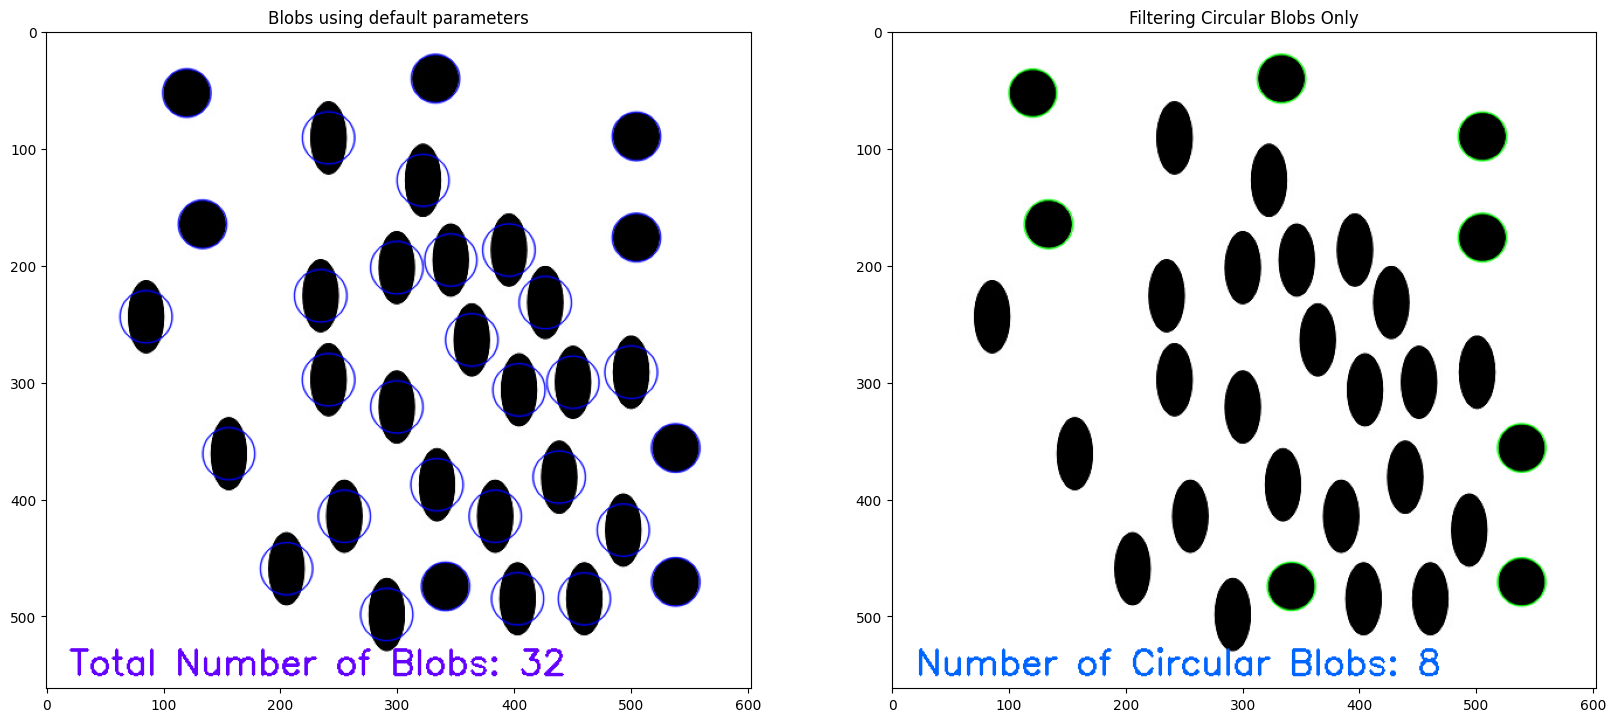

In [1]:
### 14.Counting Circles and Ellipses
### 14.원과 타원 세기

import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread("../Examples/blobs.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,20))

# 기본 파라미터를 사용하여 디텍터를 초기화
detector = cv2.SimpleBlobDetector_create()

# 블롭 탐지
keypoints = detector.detect(image)

# 이미지위에 블롭을 그리고 빨간 원 그리기
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,0,255),
                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
number_of_blobs = len(keypoints)
text = "Total Number of Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)

# 블롭 키폰이트가 있는 이미지 표시
plt.subplot(2,2,1)
plt.title("Blobs using default parameters")
plt.imshow(blobs)

# 필터링 매개 변수 설정
# cv2를 사용하여 파라미터 설정을 초기화 (단순 블럽 검출기)
params = cv2.SimpleBlobDetector_Params()

# 영역 필터링 매개 변수 설정
params.filterByArea = True
params.minArea = 100

# 원형 필터링 매개 변수 설정
params.filterByCircularity = True
params.minCircularity = 0.9

# 볼록성 필터링 매개변수 설정
params.filterByConvexity = False
params.minConvexity = 0.2

# 관성 필터링 매개 변수 설정
params.filterByInertia = True
params.minInertiaRatio = 0.01

# 파라미터를 사용하여 디텍터 생성
detector = cv2.SimpleBlobDetector_create(params)

# 블롭 탐지
keypoints = detector.detect(image)

# 빨간색 원으로 이미지에 점을 그리기
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                         cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# 블롭 표시
plt.subplot(2, 2, 2)
plt.title("Filtering Circular Blobs Only")
plt.imshow(blobs)